# Исследование компьютерных игр

### Описание проекта

Интернет-магазин «World of games» продаёт по всему миру компьютерные игры. По его заказу необходимо выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Данные представлены за 1980-2016 гг. Рекомендации для магазина нужно составить на 2017 год.

### <a name="contents"> Структура исследования: </a>
- [Загрузка данных и ознакомление с ними](#1)
- [Предобработка данных](#2)
  - [Полные дубли](#2.1)
  - [Переименование столбцов](#2.2)
  - [Добавление новых столбцов](#2.3)
  - [Пропуски в столбцах](#2.4)
  - [Изменение типа данных в столбцах](#2.5)
- [Исследовательский анализ данных](#3)
  - [Выпуск игр в разные годы](#3.1)
  - [Продажи игр на топ-5 платформах в 1994-2016 гг.](#3.2)
  - [Продажи игр на топ-5 платформах в 2012-2016 гг.](#3.3)
  - [График «ящик с усами» по продажам игр в разбивке по платформам](#3.4)
  - [Влияние отзывов критиков и пользователей на продажи игр](#3.5)
- [Портрет пользователя каждого региона](#4)
  - [Самые популярные платформы (топ-5)](#4.1)
  - [Самые популярные жанры (топ-5)](#4.2)
  - [Влияние рейтинга ESRB на продажи игр](#4.3)
- [Проверка гипотез](#5)
  - [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые](#5.1)
  - [Средние пользовательские рейтинги жанров Action и Sports разные](#5.2)
- [Общий вывод](#6)

### <a name="1"> Загрузка данных и ознакомление с ними </a>

Импортируем библиотеки для работы с таблицами, графиками, статистическими характеристиками:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st

Загрузим данные:

In [2]:
df = pd.read_csv('/Users/polzovatel/Desktop/Projects/Computer_games_analysis/games.csv')
df.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13979,Doom II: Hell on Earth,GBA,2002.0,Shooter,0.03,0.01,0.00,0.00,NaN,NaN,NaN
5045,Cabela's Dangerous Hunts 2009,Wii,2008.0,Sports,0.35,0.00,0.00,0.03,NaN,4.5,T
845,Dark Souls,PS3,2011.0,Role-Playing,0.75,0.51,0.54,0.22,89.0,8.7,M
12942,Project Setsuna,PSV,2016.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
8756,Doctor Who: Evacuation Earth,DS,2010.0,Adventure,0.00,0.13,0.00,0.02,NaN,NaN,NaN


Описание данных по столбцам:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Посмотрим на типы данных в столбцах, оценим размер таблицы и количество пропусков:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 16 715 строк и 11 столбцов. Встречаются пропуски. Построим наглядную диаграмму, чтобы оценить долю пропусков для каждого столбца:

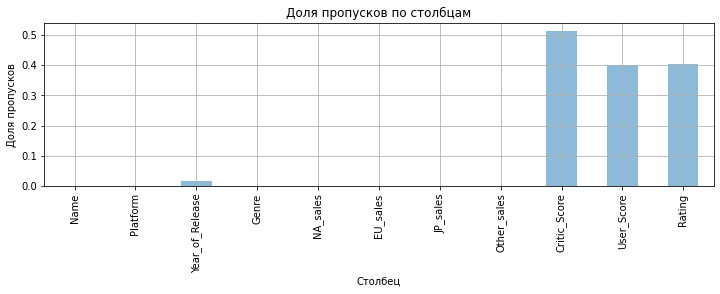

In [4]:
rows_count = len(df) # посчитаем количество строк в таблице
data = {} # создадим пустой словарь
for column in df.columns: # для каждого столбца в таблице
    nulls_count = df[column].isnull().sum() # посчитаем количество пропусков
    rate = nulls_count / rows_count # найдём долю пропусков в столбце
    data[column] = [rate] # положим в словарь название столбца и долю пропусков в нём
df_nulls_rate = pd.DataFrame(data) # из полученного словаря создадим таблицу с долей пропусков для каждого столбца
df_nulls_rate = df_nulls_rate.T.reset_index() 
df_nulls_rate.columns = ['param', 'nulls_rate']
df_nulls_rate.plot(x='param', y='nulls_rate', legend=False, figsize=(12, 3), kind='bar', grid=True, alpha=.5)
plt.title('Доля пропусков по столбцам')
plt.xlabel("Столбец")
plt.ylabel("Доля пропусков")
plt.show()

Больше всего пропусков в столбце critic_score (около 50%), user_score и rating (около 40%), немного - в Year_of_Release (около 2%).

Посмотрим на статистические характеристики числовых данных:

In [5]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


- в таблицу попали игры с годом выпуска от 1980 до 2016 г;
- максимальные значения числа продаж выглядят как явные выбросы по сравнению со значениями квартилей - можно сделать вывод, что сверхуспешные игры существенно выбиваются по продажам от большинства игр, даже тех, которые находятся возле 3 квартиля.

Посмотрим на статистические характеристики текстовых данных:

In [6]:
df.describe(include='O').T

,count,unique,top,freq
Name,16713,11559,Need for Speed: Most Wanted,12
Platform,16715,31,PS2,2161
Genre,16713,12,Action,3369
User_Score,10014,96,tbd,2424
Rating,9949,8,E,3990


- в столбце user_score встречается рейтинг tbd, надо разобраться, что это;
- игра Need for Speed: Most Wanted встречается 12 раз в таблице, надо изучить строки с этой игрой, понять, с чем связаны такие повторения игры;
- самая популярная игровая платформа - это PS2;
- самый популярный жанр - это Action;
- самый распространенный рейтинг - это E, надо разобраться подробнее, что рейтинги означают.

Оценим игровые платформы по количеству выпущенных игр, построим диаграмму:

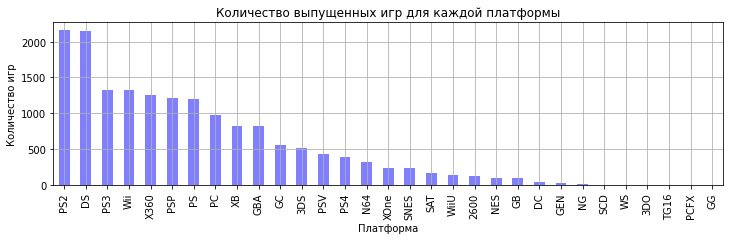

In [7]:
(df.groupby('Platform')[['Name']].count().sort_values('Name', ascending=False)
 .plot(kind='bar', grid=True, figsize=(12, 3), alpha=.5, legend=False, color='blue'))
plt.title("Количество выпущенных игр для каждой платформы")
plt.xlabel("Платформа")
plt.ylabel("Количество игр")
plt.show()

Оценим жанры игр по количеству выпущенных игр, построим диаграмму:

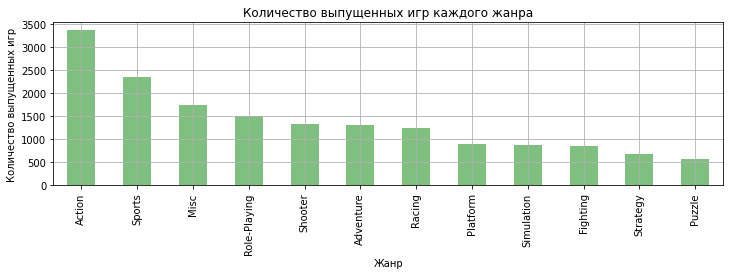

In [8]:
(df.groupby('Genre')[['Name']].count().sort_values('Name', ascending=False)
 .plot(kind='bar', grid=True, figsize=(12, 3), alpha=.5, legend=False, color='green'))
plt.title("Количество выпущенных игр каждого жанра")
plt.xlabel("Жанр")
plt.ylabel("Количество выпущенных игр")
plt.show()

Расшифровка жанров:
- Action - акцент на борьбе, включает в себя прохождение определённых уровней для достижения битвы с боссами;
- Sports - соревнования по существующим видам спорта;
- Misc (Miscellaneous game) - игры, не вошедшие в другие жанры;
- Role-playing (RPG) - решение проблем, взаимодействие с неигровыми персонажами, участие в боях, статистическое развитие персонажа;
- Shooter - неистовый темп, акцент на показные бои с использованием оружия и огромным количеством трупов;
- Adventure	- упор на головоломки без высокой активности;
- Racing - соревнования по времени между персонажами или транспортными средствами;
- Platform - основное внимание уделяется прыжкам или сложностям навигации, часто включают в себя элементы игр-экшенов;
- Simulation - имитация реальных процессов, часто без указания цели;
- Fighting - основное внимание уделяется бою один на один;
- Strategy - акцент на тактическое управление ресурсами и территорией против оппонента;
- Puzzle - решение абстрактных головоломок.

Оценим количество игр каждого рейтинга ESRB и разберёмся, что они означают:

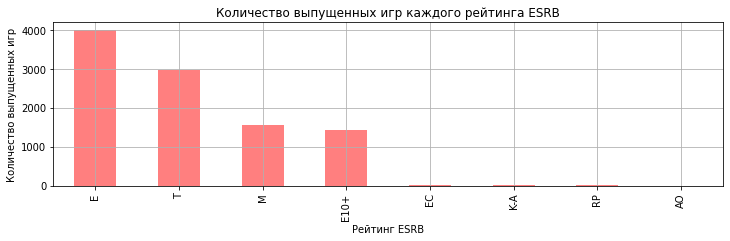

In [9]:
(df.groupby('Rating')[['Name']].count().sort_values('Name', ascending=False)
 .plot(kind='bar', grid=True, figsize=(12, 3), alpha=.5, legend=False, color='red'))
plt.title("Количество выпущенных игр каждого рейтинга ESRB")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Количество выпущенных игр")
plt.show()

Расшифровка рейтингов ESRB:
- EC («Early Childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.
- E («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первой игрой, которая получила данный рейтинг, стала The Simpsons Cartoon Studio(aнг.), выпущенная в 1996 году.
- E10+ («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года. Первой игрой, которая получила данный рейтинг, стала Donkey Kong: Jungle Beat.
- T («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- M («Mature») — «От 17 лет»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории. Некоторые торговые сети не продают игры с таким рейтингом несовершеннолетним без согласия родителей.
- AO («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. В 2006-м году данный рейтинг получили 22 продукта, большинство из которых предназначены для персональных компьютеров под управлением Windows и Apple Macintosh. Рейтинг «Только для взрослых» является предметом многочисленных дискуссий, так как накладывает серьёзные ограничения на продажи игры.
- RP («Rating Pending»") — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.
- K-A («Kids to Adults»)— «Для детей и взрослых»: Содержание игры вполне подходит для возрастной категории от 6 лет и старше. Такие игры подходят для всех возрастов. Они могут содержать минимальное насилие или немного грубый разговорный язык. Этот рейтинг был заменён на «Everyone» 1 января 1998 года и может встречаться только в играх, изданных ранее, кроме The Simpsons Cartoon Studio. Первой игрой, получившей данный рейтинг, стала SimCity 2000 в 1994 году.

Посмотрим на все игры с названием Need for Speed: Most Wanted, оценим, нет ли проблем в данных в связи с повторениями в названиях игр. Предварительно приведём названия всех игр к нижнему регистру, чтобы не пропустить все возможные варианты написания.

In [10]:
df.Name = df.Name.str.lower()
df.query('Name == "need for speed: most wanted"')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
253,need for speed: most wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,need for speed: most wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,need for speed: most wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,need for speed: most wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,need for speed: most wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,need for speed: most wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,need for speed: most wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,need for speed: most wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,need for speed: most wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,need for speed: most wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


Видно, что повторения вызваны тем, что игра выходила на разных платформах. Выпуск игры был в 2005 году, переиздание в 2012 году. Данные верные.

Выводы после первичного знакомства с данными:
- в таблице 16 715 строк и 11 столбцов;
- названия столбцов записаны с заглавных букв, корректнее изменить их, чтобы они полностью состояли из строчных букв;
- встречаются пропуски: больше всего - в столбце critic_score (около 50%), user_score и rating (около 40%), немного - в Year_of_Release (около 2%);
- в таблицу попали игры с годом выпуска от 1980 до 2016 г;
- максимальные значения объёмов продаж выглядят как явные выбросы по сравнению со значениями квартилей - можно сделать вывод, что сверхуспешные игры существенно отличаются по продажам от большинства игр;
- в столбце user_score встречается рейтинг tbd, надо разобраться, что это;
- некоторые игры встречается в таблице несколько раз, повторения вызваны тем, что игры выходили на разных платформах и в разные годы;
- самая популярная игровая платформа по количеству выпушенных игр - это PS2 и Nintendo DS;
- самый популярный жанр по количеству выпушенных игр - это Action;
- самый распространенный рейтинг по количеству выпушенных игр - это «E» («Everyone») — «Для всех».

[К началу](#contents)

### <a name="2"> Предобработка данных </a>

#### <a name="2.1"> Полные дубли </a>

Оценим количество полных дублей:

In [11]:
df.duplicated().sum() 

0

#### <a name="2.2"> Переименование столбцов </a>

Приведём названия столбцов к нижнему регистру:

In [12]:
df.columns = [i.lower() for i in df.columns]
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### <a name="2.3"> Добавление новых столбцов </a>

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец:

In [13]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales
df.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54


#### <a name="2.4"> Пропуски в столбцах </a>

Посмотрим внимательнее на столбцы с пропусками значений, попробуем разобраться с причинами пропусков и заполнить ячейки:

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


- столбец name - всего 2 пропуска;
- столбец genre - всего 2 пропуска;
- в столбце year_of_release почти 300 пропусков;
- в столбцах critic_score, user_score и rating более 6000 пропусков в каждом;

Посмотрим на 2 строки с пропусками в столбце name:

In [15]:
df[df.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Видно, что:
- это те же строки, где 2 пропуска в столбце genre;
- нет данных ни по одному рейтингу;
- это две игры на Sega Genesis, вышедшие в 1993 году;
- одна игра разошлась относительно небольшим тиражом - 30 тыс. копий, а вторая стала достаточно популярной - 1,78 млн копий в Северной Америке и пол млн копий в Европе.

При поиске игры, которая вышла на Sega Genesis в 1993 году и разошлась 1,78 млн копиями в Северной Америке, удалось найти совпадение с игрой Mortal Kombat II. Добавим название и жанр этой игры в таблицу:

In [16]:
df.loc[659, 'name'] = 'mortal kombat ii'
df.loc[659, 'genre'] = 'Fighting'
df.loc[659, ['name', 'genre']]

name     mortal kombat ii
genre            Fighting
Name: 659, dtype: object

Проверим, не получился ли дубль:

In [17]:
df[df.name == "mortal kombat ii"]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,mortal kombat ii,GEN,1993.0,Fighting,1.78,0.53,0.0,0.08,NaN,NaN,NaN,2.39
892,mortal kombat ii,SNES,1993.0,Fighting,1.48,0.39,0.0,0.06,NaN,NaN,NaN,1.93


В таблице уже была такая игра, но для другой консоли, поэтому проблем с дублированием нет.

К сожалению, идентфицировать вторую игру с пропушенным именем достаточно сложно. Удалим эту строку:

In [18]:
df.dropna(subset = ['name'], inplace = True)
len(df)

16714

Теперь посмотрим на пропуски в столбце year_of_release, оценим точно количество и долю пропусков:

In [19]:
(len(df[df.year_of_release.isnull()]),
len(df[df.year_of_release.isnull()]) / len(df))

(269, 0.01609429221012325)

269 пропусков или 1,6% от количества игр в таблице.

Посмотрим на несколько игр, в которых пропущен год выпуска:

In [20]:
df.query('year_of_release.isnull()').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,fifa soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53


Можно заметить, что у некоторых игр в названии указан год. Релиз таких игр происходит всегда годом ранее, например, fifa soccer 2004 вышла в 2003 году. Напишем функцию, которая будет искать год в названии игры и добавлять его в столбец year_of_release, если там пропуск.

In [21]:
def foo(row):
    years_85_99 = [str(i) for i in range(85, 100)]
    years_2000_2016 = [str(i) for i in range(2000, 2017)]
    years = years_85_99 + years_2000_2016
    if row.isnull().year_of_release:
        for year in years_85_99:
            if year in row['name']:
                return int('19' + year) - 1
        for year in years_2000_2016:
            if year in row['name']:
                return int(year) - 1
        return row['year_of_release']
    return row['year_of_release']

Найдём годы в названии игр и добавим их в столбец year_of_release. Посмотрим как сработает функция на нескольких примерах:

In [22]:
print('До применения функции:')
display(df.loc[[183, 377, 1301], ['name','year_of_release']])
df['year_of_release'] = df.apply(foo, axis=1) 
print()
print('После применения функции:')
display(df.loc[[183, 377, 1301], ['name','year_of_release']])

До применения функции:


,name,year_of_release
183,madden nfl 2004,NaN
377,fifa soccer 2004,NaN
1301,triple play 99,NaN



После применения функции:


,name,year_of_release
183,madden nfl 2004,2003.0
377,fifa soccer 2004,2003.0
1301,triple play 99,1998.0


Функция сработала, посмотрим, сколько теперь осталось пропусков в столбце year_of_release:

In [23]:
(len(df[df.year_of_release.isnull()]),
len(df[df.year_of_release.isnull()]) / len(df))

(250, 0.014957520641378485)

Было 269 пропусков, а стало 250. Данные в 19 игр восстановили.

Для остальных игр, к сожалению, нет возможности восстановить данные о годах выпуска, кроме ручного поиска в интернете и подставления в таблицу. Но это слишком долго, а пропусков у нас осталось только 1,5%. Удалим такие строки.

Составим список всех игр, которые встречаются несколько раз в таблице, и посчитаем, сколько игр в этом списке:

In [24]:
list_of_dupl = df[(df.name.duplicated())].name.unique()
len(list_of_dupl)

2806

2806 игр встречается в таблице более одного раза. 

Теперь составим словарь, в который будем складывать названия игр, для которых в одной из строк пропущен год выпуска, а в другой одной из строк есть значение года, и значение этого года:

In [25]:
names_and_years = {}
for name in list_of_dupl: # для каждой игры из тех, что встречаются в таблице больше 1 раза:
    if (len(df[(df.name == name) & (df.year_of_release.isnull())]) > 0 and # проверяем, что для игры есть пропуск в годе
        len(df[(df.name == name) & (df.year_of_release.notnull())]) > 0): # проверяем, что для игры есть значение в годе
        # складываем в словарь название игры с пропуском в годе и значение года
        names_and_years[name] = df[(df.name == name) & (df.year_of_release.notnull())].year_of_release.iloc[0]

Проверим, что удалось собрать словарь:

In [26]:
names_and_years

{'call of duty: black ops': 2010.0,
 'lego batman: the videogame': 2008.0,
 'street fighter iv': 2009.0,
 'madden nfl 11': 2010.0,
 'lego indiana jones: the original adventures': 2008.0,
 'call of duty 3': 2006.0,
 'madden nfl 06': 2005.0,
 'namco museum': 2001.0,
 'madden nfl 07': 2006.0,
 'bioshock 2': 2010.0,
 'hitman 2: silent assassin': 2002.0,
 'mario tennis': 2000.0,
 'sonic the hedgehog': 1991.0,
 'rocksmith': 2011.0,
 'wheel of fortune': 1998.0,
 'lego harry potter: years 5-7': 2012.0,
 'dead space 3': 2013.0,
 'rhythm heaven': 2008.0,
 'grid': 2008.0,
 'the lord of the rings: war in the north': 2011.0,
 'nba street vol. 2': 2003.0,
 'shaun white snowboarding': 2008.0,
 'dead island: riptide': 2013.0,
 'the golden compass': 2007.0,
 'def jam: fight for ny': 2004.0,
 'metal gear solid 2: substance': 2002.0,
 'gun': 2005.0,
 'tiger woods pga tour 07': 2006.0,
 'wet': 2009.0,
 'shrek the third': 2007.0,
 'space invaders': 1994.0,
 'the chronicles of narnia: the lion, the witch an

Проверим на примере пары игр из составленного словаря, что в таблице есть как строки с пропущенным годом, так и с заполненным:

In [27]:
df[df.name == 'call of duty: black ops']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
32,call of duty: black ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
41,call of duty: black ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
1131,call of duty: black ops,PC,NaN,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M,1.62
1412,call of duty: black ops,Wii,2010.0,Shooter,0.80,0.45,0.00,0.12,80.0,5.8,M,1.37
3439,call of duty: black ops,DS,2010.0,Shooter,0.50,0.04,0.00,0.04,74.0,6,T,0.58


In [28]:
df[df.name == 'lego batman: the videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
397,lego batman: the videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+,3.38
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+,3.06
460,lego batman: the videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+,3.05
1519,lego batman: the videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+,1.30
1538,lego batman: the videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+,1.28
1553,lego batman: the videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+,1.27
12465,lego batman: the videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+,0.06


Игры соответствует нашему требованию: есть и пропуски, и значения.

Теперь напишем функцию, которая будет для строк, где название игры есть в словаре, а год выпуска пропущен, возвращать год выпуска:

In [29]:
def year_restore(row):
    if (not row['year_of_release'] > 0 # проверяем, что значение пропущено (если nan, то not False = True) 
        and (row['name'] in names_and_years)): # проверяем, что игра есть в словаре
        return names_and_years[row['name']]
    return row['year_of_release']

Применим эту функцию к таблице:

In [30]:
df.year_of_release = df.apply(year_restore, axis=1)

Теперь проверим на примере тех же двух игр, что функция отработала так, как мы хотели. 

In [31]:
df[df.name == 'call of duty: black ops']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
32,call of duty: black ops,X360,2010.0,Shooter,9.70,3.68,0.11,1.13,87.0,6.3,M,14.62
41,call of duty: black ops,PS3,2010.0,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M,12.63
1131,call of duty: black ops,PC,2010.0,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M,1.62
1412,call of duty: black ops,Wii,2010.0,Shooter,0.80,0.45,0.00,0.12,80.0,5.8,M,1.37
3439,call of duty: black ops,DS,2010.0,Shooter,0.50,0.04,0.00,0.04,74.0,6,T,0.58


In [32]:
df[df.name == 'lego batman: the videogame']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
397,lego batman: the videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+,3.38
456,lego batman: the videogame,Wii,2008.0,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+,3.06
460,lego batman: the videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+,3.05
1519,lego batman: the videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+,1.30
1538,lego batman: the videogame,PSP,2008.0,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+,1.28
1553,lego batman: the videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+,1.27
12465,lego batman: the videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+,0.06


Пропуски заполнены. Посчитаем, сколько удалось восстановить данных таким образом:

In [33]:
(len(df[df.year_of_release.isnull()]),
len(df[df.year_of_release.isnull()]) / len(df))

(137, 0.00819672131147541)

Было 250 пропусков, а стало 137. Восстановлены данные для 113 пропусков.

Удалим все оставшиеся строки с пропусками в столбце year_of_release:

In [34]:
df.dropna(subset = ['year_of_release'], inplace = True)
len(df), len(df[df.year_of_release.isnull()])

(16577, 0)

Количество строк в таблице теперь 16 577, пропусков в столбце year_of_release не осталось.

Остались пропуски в столбцах critic_score, user_score и rating. Можно выдвинуть гипотезу, что пропуски связаны с тем, что игры были недостаточно популярные, чтобы их включали в рейтинги. Если так, то пропуски будут значительно пересекаться в этих столбцах. Вычислим, сколько таких пересечений по всем трём столбцам:

In [35]:
print('Пропусков в столбце critic_score:', len(df[df.critic_score.isnull()]))
print('Пропусков в столбце user_score:', len(df[df.user_score.isnull()]))
print('Пропусков в столбце rating:', len(df[df.rating.isnull()]))
print('Строк с пропусками хотя бы в одном столбце:', len(df[df.critic_score.isnull() | 
                                                            df.rating.isnull() | df.user_score.isnull()]))
print('Строк с пропусками в трёх столбцах:', len(df[df.critic_score.isnull() & 
                                                       df.rating.isnull() & df.user_score.isnull()]))

Пропусков в столбце critic_score: 8497
Пропусков в столбце user_score: 6638
Пропусков в столбце rating: 6705
Строк с пропусками хотя бы в одном столбце: 8608
Строк с пропусками в трёх столбцах: 6560


Много пересечений по столбцам. Если пропуски связаны с популярностью игр, то и продаж у игр без рейтингов будет в среднем меньше. Проверим, какое среднее количество продаж у игр без рейтингов и игр с рейтингами. 

In [36]:
print('Среднее количество продаж для игр без рейтинга, млн: ',
df[df.critic_score.isnull() & df.rating.isnull() & df.user_score.isnull()].total_sales.mean())
print('Среднее количество продаж для игр с рейтингом, млн: ',
df[df.critic_score.notnull() & df.rating.notnull() & df.user_score.notnull()].total_sales.mean())

Среднее количество продаж для игр без рейтинга, млн:  0.42879268292682926
Среднее количество продаж для игр с рейтингом, млн:  0.6969958589534446


Оценим, является ли такое различие случайным или оно статистически значимо. Сформулируем нулевую и альтернативную гипотезы:
- Нулевая гипотеза: среднее количество продаж для игр без рейтинга и с рейтингом одинаковое.
- Альтернативная гипотеза: среднее количество продаж для игр без рейтинга ниже, чем для игр с рейтингом.

Составим две выборки: в одной будут продажи игр без рейтинга, во второй - продажи игр с рейтингом:

In [37]:
with_rating = df[df.critic_score.notnull() & df.rating.notnull() & df.user_score.notnull()]['total_sales']
without_rating = df[df.critic_score.isnull() & df.rating.isnull() & df.user_score.isnull()]['total_sales']

Рассчитаем дисперсии в выборках:

In [38]:
var_with_rating = np.var(with_rating, ddof=1)
var_without_rating = np.var(without_rating, ddof=1)
var_with_rating, var_without_rating

(3.359339643682649, 1.8917366729758776)

Проведём расчёты и найдём p-value. Применим метод ttest_ind, который принимает на вход две выборки, а на выходе мы получим вероятность, что они из одной ГС. Пороговый уровень альфа установим 0,05.

In [39]:
results = st.ttest_ind(with_rating, without_rating, equal_var=False)
# equal_var=False, так как дисперсии двух выборок отличаются почти в два раза. В связи с этим вместо t-критерия Стьюдента 
# применяем t-критерий Уэлча. 
print('Вероятность совершить ошибку первого рода:', results.pvalue / 2) # делим пополам, так как делаем одностороннюю проверку 
if results.pvalue / 2 < .5:
    print('Это меньше порогового значения альфа 0,05. Принимаем альтернативную гипотезу.')
else:
    print('Это больше порогового значения альфа 0,05. Недостаточно оснований отклонить нулевую гипотезу.')

Вероятность совершить ошибку первого рода: 4.6775968066342554e-24
Это меньше порогового значения альфа 0,05. Принимаем альтернативную гипотезу.


Это означает, что пропуски появились не случайно хаотичным образом, а связаны с популярностью игр - для популярных игр их меньше, для непопулярных - больше.

Обрабатывать поля с пропусками в столбцах с рейтингами не будем: для заполнения у нас нет данных, а удалить строки целиком мы не можем, так как в таком случае потеряем около 50% данных.

#### <a name="2.5"> Изменение типа данных в столбцах </a>

В столбце user_score указывается рейтинг игры по версии пользователей. Логично, что данные должны быть числового типа, но сейчас они текстовые. Проблема в том, что среди значений встречаются tbd. Такие значения - это скорее всего аббревиатура от английского To Be Determined (будет определено). Она используется, если какая-то информация еще не определена или решение по вопросу не принято. По смыслу это очень похоже на значение Nan, которое используется в качестве заполнителя для отсутствия данных. В связи с этим заменим все tbd на Nan:

In [40]:
print('До замены tbd на Nan:')
print(f'количество значений tbd:', len(df.query('user_score == "tbd"')))
print(f'количество значений Nan:', len(df[df.user_score.isnull()]))
df['user_score'] = df['user_score'].where(df['user_score'] != "tbd", np.nan)
print()
print('После замены tbd на Nan:')
print(f'количество значений tbd:', len(df.query('user_score == "tbd"')))
print(f'количество значений Nan:', len(df[df.user_score.isnull()]))

До замены tbd на Nan:
количество значений tbd: 2395
количество значений Nan: 6638

После замены tbd на Nan:
количество значений tbd: 0
количество значений Nan: 9033


Теперь, когда текстовых значений не осталось в столбце user_score, заменим тип данных с текстового на числовой:

In [41]:
print('До преобразования типа данных:')
df.loc[3, 'user_score']
type(df.loc[3, 'user_score'])
print(f'пример значения: {df.loc[3, "user_score"]}, его тип данных: {type(df.loc[3, "user_score"])}')
df.user_score = pd.to_numeric(df.user_score)
print()
print('После преобразования типа данных:')
print(f'это же значение: {df.loc[3, "user_score"]}, новый тип данных: {type(df.loc[3, "user_score"])}')

До преобразования типа данных:
пример значения: 8, его тип данных: <class 'str'>

После преобразования типа данных:
это же значение: 8.0, новый тип данных: <class 'numpy.float64'>


Заменим также тип данных в столбце year_of_release - дробные числа нам не нужны:

In [42]:
df.year_of_release = df.year_of_release.astype('int16')

Взглянем на итоговый вид таблицы:

In [43]:
df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


В ходе предобработки данных:
- были изменены названия столбцов - приведены к строчным буквам;
- добавлен новый столбец total_sales, который включил в себя сумму продаж игр по всем регионам;
- обработаны пропуски в столбцах name, genre и year_of_release - частично данные были восстановлено, частично удалены;
- установлена логика в появлении пропусков в столбцах critic_score, critic_score и rating - обнаружено, что для популярных игр их меньше, для непопулярных - больше;
- в столбце user_score все значения tbd заменены на nan, так как по смыслу они схожи;
- заменены типы данных в столбце user_score с object на float, в столбце year_of_release с float на int.

[К началу](#contents)

### <a name="3"> Исследовательский анализ данных </a>

#### <a name="3.1"> Выпуск игр в разные годы </a>

Посмотрим, сколько игр выпускалось в разные годы: 

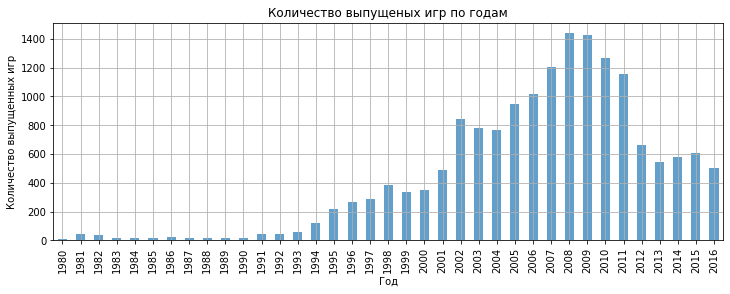

In [44]:
df.groupby('year_of_release')['name'].count().plot(kind='bar', grid=True, figsize=(12, 4), 
                                                   alpha=.7, legend=False)
plt.title("Количество выпущеных игр по годам")
plt.xlabel("Год")
plt.ylabel("Количество выпущенных игр")
plt.show()

Можно заметить, что только начиная с 1994 года количество игр начало заметно расти. В связи с этим, будем считать важным для анализа периодом 1994-2016 гг.

Уберём из нашей таблицы данные до 1994 года:

In [45]:
print(len(df.query('year_of_release < 1994')))
df = df.query('year_of_release >= 1994').reset_index(drop=True)
len(df)

367


16210

Было удалено 366 строк, в таблице осталось 16 098 игр.

#### <a name="3.2"> Продажи игр на топ-5 платформах в 1994-2016 гг. </a>

Посмотрим, как менялись продажи по платформам. Напишем функцию, с помощью которой получим топ платформ с наибольшими суммарными продажами:

In [46]:
def top(df, amount):
    return (df.groupby('platform')[['total_sales']].sum()
            .sort_values('total_sales', ascending=False).head(amount).reset_index())

Посмотрим на топ-5 платформ по продажам:

In [47]:
top_platforms = top(df, 5)
top_platforms

,platform,total_sales
0,PS2,1250.92
1,X360,966.67
2,PS3,934.71
3,Wii,903.31
4,DS,804.26


Теперь построим графики для этих платформ по количеству продаж копий игр в каждый год. Для начала напишем функцию, которая составит таблицу и добавит в неё эти топ-5 платформ, годы продаж и объёмы продаж копий игр:

In [48]:
def top_with_years(df, platforms_list):
    return (df.query('platform in @platforms_list')
                              .groupby(['platform', 'year_of_release'])[['total_sales']].sum().reset_index())

In [49]:
top_platforms_list = list(top_platforms.platform)
top_platforms_with_years = top_with_years(df, top_platforms_list)
top_platforms_with_years.head()

,platform,year_of_release,total_sales
0,DS,2004,17.27
1,DS,2005,130.14
2,DS,2006,119.81
3,DS,2007,147.24
4,DS,2008,145.35


Напишем функцию, которая будет строить графики:

In [50]:
def graph(df, platform):
    return df.query('platform == @platform').plot(ax=ax, x='year_of_release', y='total_sales', 
                                                           linewidth=3, label=platform, grid=True, style='o-')

Построим графики продаж игр для 5 самых популярных игровых платформ:

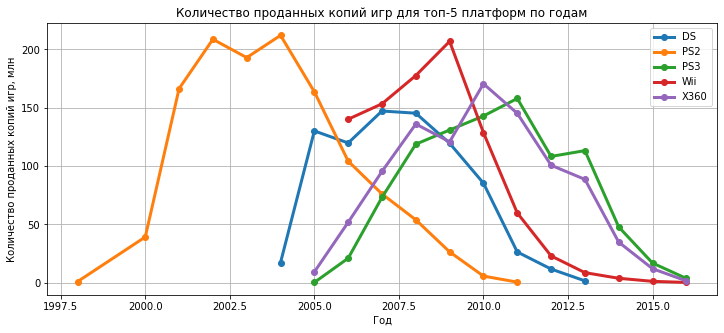

In [51]:
ax = (top_platforms_with_years.query('platform == "DS"').plot(x='year_of_release', y='total_sales', style='o-'
                                                                , figsize=(12, 5), linewidth=3, label="DS"))
graph(top_platforms_with_years, "PS2")
graph(top_platforms_with_years, "PS3")
graph(top_platforms_with_years, "Wii")
graph(top_platforms_with_years, "X360")
plt.title("Количество проданных копий игр для топ-5 платформ по годам")
plt.xlabel("Год")
plt.ylabel("Количество проданных копий игр, млн")
plt.show()

По графикам видно, что:
- PS2 и Wii превысили отметку в 200 млн проданных копий игр в год - это платформы, достигшие максимальной популярности; 
- срок актуальности игровых платформ составляет примерно 10 лет, причём в первые 4-5 лет количество проданных игр растёт, а затем начинает падать.

Для нашего исследования будем считать актуальным периодом последние 5 лет. На этом промежутке времени количество продаж игр для платформ либо только падает, либо достигает своего пика, либо только растёт. Этого интервала достаточно, чтобы прогнозировать популярность платформ на 2017 год.

Уберём из нашей таблицы данные до 2012 года:

In [52]:
print(len(df.query('year_of_release < 2012')))
df = df.query('year_of_release >= 2012').reset_index(drop=True)
len(df)

13311


2899

Было удалено 13 211 строк, в таблице осталось 2887 игр.

#### <a name="3.3"> Продажи игр на топ-5 платформах в 2012-2016 гг. </a>

Посмотрим, как менялись продажи по платформам в последние 5 лет. Выведем топ-5 платформ с наибольшими суммарными продажами:

In [53]:
top_platforms = top(df, 5)
top_platforms

,platform,total_sales
0,PS4,314.14
1,PS3,289.71
2,X360,237.52
3,3DS,195.01
4,XOne,159.32


Построим графики продаж игр для 5 самых популярных игровых платформ в последние 5 лет:

In [54]:
top_platforms_list = list(top_platforms.platform)
top_platforms_with_years = top_with_years(df, top_platforms_list)

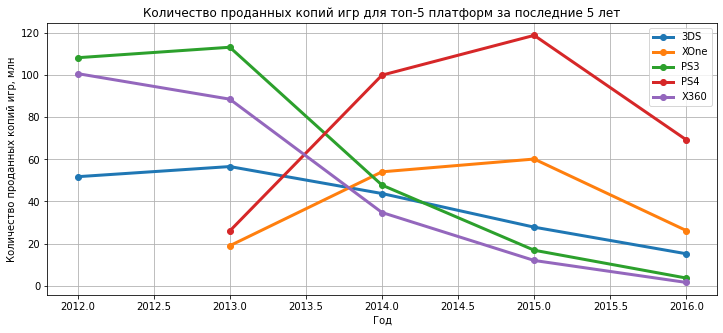

In [55]:
ax = (top_platforms_with_years.query('platform == "3DS"').plot(x='year_of_release', y='total_sales', style='o-'
                                                                , figsize=(12, 5), linewidth=3, label="3DS"))
graph(top_platforms_with_years, "XOne")
graph(top_platforms_with_years, "PS3")
graph(top_platforms_with_years, "PS4")
graph(top_platforms_with_years, "X360")
plt.title("Количество проданных копий игр для топ-5 платформ за последние 5 лет")
plt.xlabel("Год")
plt.ylabel("Количество проданных копий игр, млн")
plt.show()

По графикам видно, что:
- за последние 5 лет максимальные продажи игр в год для одной платформы составили около 120 млн копий (PS4 в 2015 и PS3 в 2013), тогда как ранее одна приставка могла продать более 200 млн копий игр в год (например, Wii в 2009 году, это видно на предыдущем графике) - популярность самых популярных приставок падает;
- платформы PS4 и XOne имеют наиболее ранние этапы своих жизненных циклов - первые игры для них появились в 2013 году и в продаже пока только 4 года. На эти платформы надо делать ставку - в 2017 году игры на них будут продаваться наиболее активно;
- количество проданных игр для платформ 3DS, X360, PS3 планомерно снижается последние 5 лет - это уже устаревшие платформы и на них делать ставку не стоит в 2017 году.

#### <a name="3.4"> График «ящик с усами» по продажам игр в разбивке по платформам </a>

Построим сводную таблицу с названиями игр и количеством проданных копий для каждой платформы из топ-5 за 2012-2016 гг.

In [56]:
df_pivot = (df.query("platform in @top_platforms_list")
            .pivot_table(index=['name'], columns='platform', values='total_sales', aggfunc=['sum'])
            .reset_index())
df_pivot.columns = ['name', '3DS', 'PS3', 'PS4', 'X360', 'XOne']
df_pivot.head()

,name,3DS,PS3,PS4,X360,XOne
0,beyblade burst,0.03,NaN,NaN,NaN,NaN
1,fire emblem fates,1.67,NaN,NaN,NaN,NaN
2,frozen: olaf's quest,0.59,NaN,NaN,NaN,NaN
3,haikyu!! cross team match!,0.04,NaN,NaN,NaN,NaN
4,tales of xillia 2,NaN,0.84,NaN,NaN,NaN


На основе этой таблицы построим диаграмму размаха проданных игр для каждой платформы:

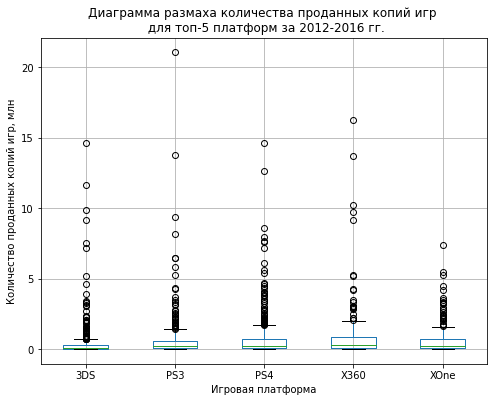

In [57]:
df_pivot.boxplot(column=['3DS', 'PS3', 'PS4', 'X360', 'XOne'], figsize=(8,6))
plt.title("Диаграмма размаха количества проданных копий игр \n для топ-5 платформ за 2012-2016 гг.")
plt.xlabel("Игровая платформа")
plt.ylabel("Количество проданных копий игр, млн")
plt.show()

Можно заметить, что игры, которые разошлись больше, чем 2 млн копий, являются выбросами для всех пяти платформ. Эти выбросы сжимают наши боксплоты и прижимают их к нулю на графике.

Изменим масштаб графика, посмотрим ближе на область 0-2 млн проданных копий:

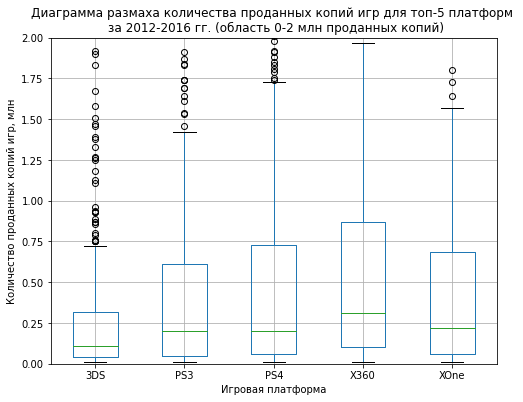

In [58]:
df_pivot.boxplot(column=['3DS', 'PS3', 'PS4', 'X360', 'XOne'], figsize=(8,6))
plt.title("Диаграмма размаха количества проданных копий игр для топ-5 платформ \n за 2012-2016 гг. (область 0-2 млн проданных копий)")
plt.xlabel("Игровая платформа")
plt.ylabel("Количество проданных копий игр, млн")
plt.ylim(0, 2)
plt.show()

Можно сделать следующие выводы:
- медианное количество проданных игр выше всего для платформы X360 и составляет около 300 тыс. копий. Ниже всего - для 3DS - около 100 тыс. копий;
- У X360 самая широкая диаграмма размаха. Несмотря на то, что самая популярная игра выходила на PS3 (больше 20 млн копий, видно на предыдущем графике), у X360 больше количество популярных игр, которые и вытягивают боксплот вверх;
- У 3DS самый узкая диаграмма размаха - у этой платформы игры наименее популярные среди топ-5 платформ.

#### <a name="3.5"> Влияние отзывов критиков и пользователей на продажи игр </a>

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Напишем функцию, которая будет считать корреляцию между отзывами пользователей и критиков и продажами, а также строить диаграмму рассеяния. 

In [59]:
def scatter(df, platform):
    df.plot(kind='scatter', x='critic_score', y='total_sales', grid=True, figsize=(8, 3), color='purple')
    plt.title(f"Диаграмма рассеяния количества проданных копий игр \n и рейтинга критиков для {platform} за 2012-2016 гг.")
    plt.xlabel("Рейтинг критиков")
    plt.ylabel("Количество проданных \n копий игр, млн")
    df.plot(kind='scatter', x='user_score', y='total_sales', grid=True, figsize=(8, 3), color='orange')
    plt.title(f"Диаграмма рассеяния количества проданных копий игр \n и рейтинга пользователей для {platform} за 2012-2016 гг.")
    plt.xlabel("Рейтинг пользователей")
    plt.ylabel("Количество проданных \n копий игр, млн")
    plt.show()

Применим эту функцию для получения коэффициентов корреляции и построения графиков:

Корреляция между отзывами и продажами для PS4:


,total_sales,user_score,critic_score
total_sales,1.000000,-0.031957,0.406568
user_score,-0.031957,1.000000,0.557654
critic_score,0.406568,0.557654,1.000000


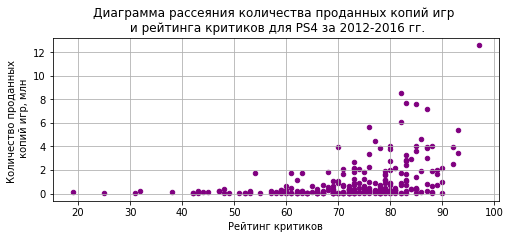

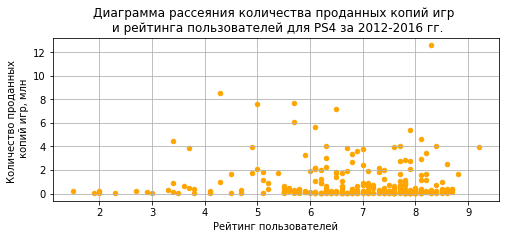

------------------------------------------------------------

Корреляция между отзывами и продажами для PS3:


,total_sales,user_score,critic_score
total_sales,1.000000,-0.005043,0.331371
user_score,-0.005043,1.000000,0.539525
critic_score,0.331371,0.539525,1.000000


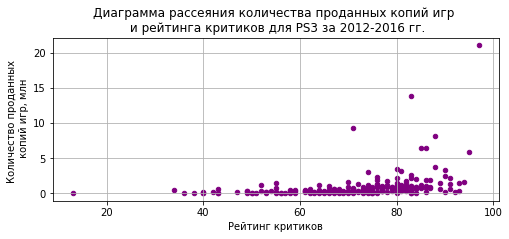

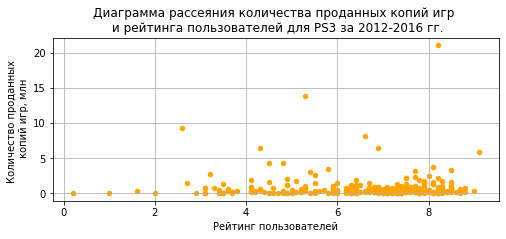

------------------------------------------------------------

Корреляция между отзывами и продажами для X360:


,total_sales,user_score,critic_score
total_sales,1.000000,0.006315,0.360266
user_score,0.006315,1.000000,0.557952
critic_score,0.360266,0.557952,1.000000


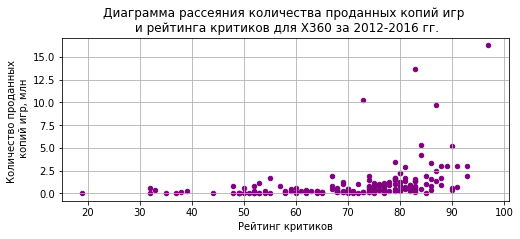

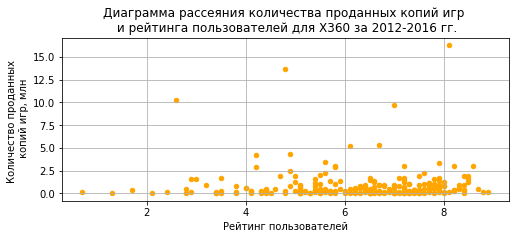

------------------------------------------------------------

Корреляция между отзывами и продажами для 3DS:


,total_sales,user_score,critic_score
total_sales,1.000000,0.198150,0.320458
user_score,0.198150,1.000000,0.721517
critic_score,0.320458,0.721517,1.000000


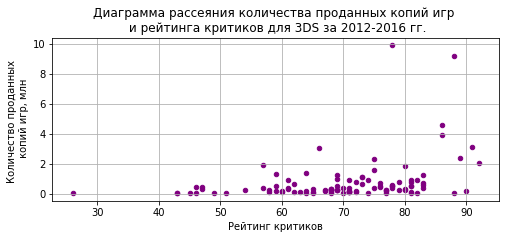

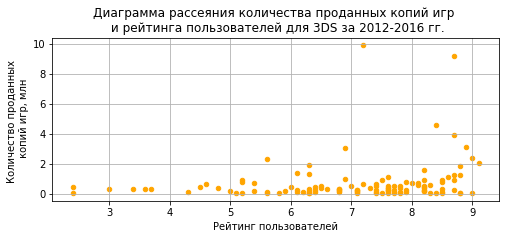

------------------------------------------------------------

Корреляция между отзывами и продажами для XOne:


,total_sales,user_score,critic_score
total_sales,1.000000,-0.068925,0.416998
user_score,-0.068925,1.000000,0.472462
critic_score,0.416998,0.472462,1.000000


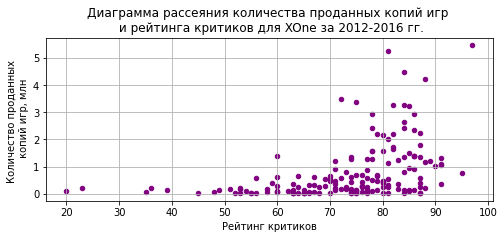

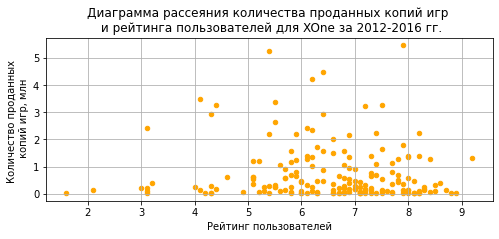

------------------------------------------------------------



In [60]:
for platform in top_platforms_list:
    df_platform = df.query('platform == @platform')[['total_sales', 'user_score', 'critic_score']]
    print(f'Корреляция между отзывами и продажами для {platform}:')
    display(df_platform.corr())
    scatter(df_platform, platform)
    print("------------------------------------------------------------")
    print()

Можно заметить, что:
- продажи игр и рейтинг пользователей имеют практически нулевую корреляцию для платформ. Единственное исключение - 3DS. Корреляция составляет 0,2, что означает, что взаимосвязь тем не менее есть, но очень низкая;
- продажи игр и рейтинг критиков для всех платформ коррелируют в диапазоне от 0,32 до 0,42 - это говорит о том, что есть небольшая положительная взаимосвязь между этими параметрами. Наибольшая корреляция для XOne, наименьшая - для 3DS;
- рейтинг пользователей и рейтинг критиков коррелируют в диапазоне от 0,47 до 0,72. Наибольшая корреляция у 3DS, взаимосвязь для этой платформы сильная. Для остальных платформ корреляция умеренно выраженная.

#### <a name="3.6"> Общее распределение игр по жанрам </a>

Посмотрим на общее распределение игр по жанрам за актуальный период - 2012-2016 гг.

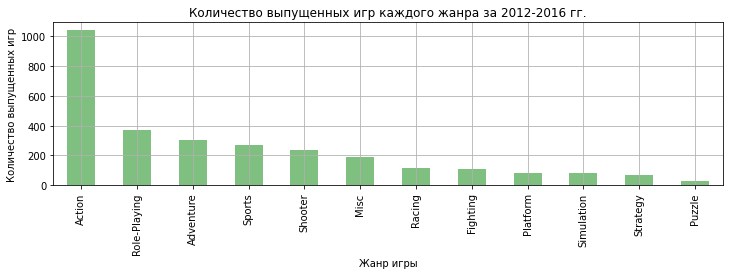

In [61]:
(df.groupby('genre')[['name']].count().sort_values('name', ascending=False)
 .plot(kind='bar', grid=True, figsize=(12, 3), alpha=.5, legend=False, color='green'))
plt.title("Количество выпущенных игр каждого жанра за 2012-2016 гг.")
plt.xlabel("Жанр игры")
plt.ylabel("Количество выпущенных игр")
plt.show()

Из распределения можно сделать выводы, что:
- самый популярный жанр за всё время наблюдений (36 лет) и за последние 5 лет не изменился - это Action, причём с большим отрывом от второго места;
- однако топ-3 жанров изменился: если за всё время наблюдений 2 и 3 место занимают Sports и Misc, то за последние 5 лет - Role-Playing и Adventure;
- наименее популярным жанром был и остаётся Puzzle;
- за последние 5 лет вышло более 1000 игр в жанре Action и менее 50 игр в жанре Puzzle.

[К началу](#contents)

### <a name="4"> Портрет пользователя каждого региона </a>

#### <a name="4.1"> Самые популярные платформы (топ-5) </a>

Ранее, в самом начале исследования мы составили топ-5 платформ по количеству выпущенных игр. Теперь составим топ-5 платформ по количеству проданных копий игр - по-отдельности для каждого региона.

Напишем функцию, которая будет принимать в качестве параметра регион продаж и возвращать диаграмму с топ-5 платформами и количеством проданных копий игр для них:

In [62]:
def top_platforms(region_sales):
    dict = {'na_sales': 'Северной Америке', 'eu_sales': 'Европе', 'jp_sales': 'Японии'}
    (df.groupby('platform')[[region_sales]].sum().sort_values(region_sales, ascending=False).head()
     .plot(kind='bar', grid=True, figsize=(7, 3), alpha=.5, legend=False, color='blue'))
    plt.title(f"Топ-5 платформ по количеству проданных копий игр в {dict[region_sales]}")
    plt.xlabel("Платформа")
    plt.ylabel("Количество проданных копий \n игр, млн")
    plt.show()

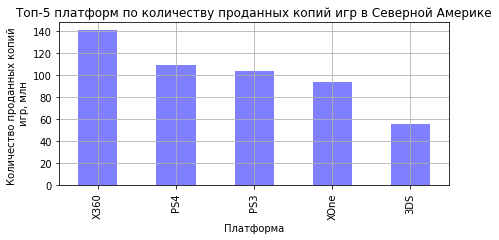

In [63]:
top_platforms('na_sales')

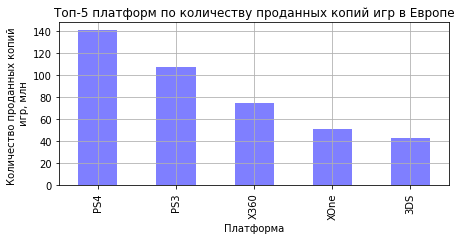

In [64]:
top_platforms('eu_sales')

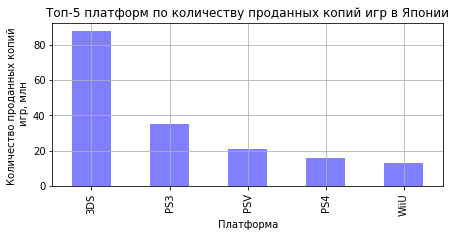

In [65]:
top_platforms('jp_sales')

Можно заметить, что:
- в Северной Америке самая популярная платформа - это Xbox360. Возможно это связано с тем, что компания Microsoft, которая выпускает эту консоль, сама из США и наиболее активный маркетинг проводит у себя на родине;
- в Европе 1 и 2 место занимают консоли от Sony двух разных поколений;
- в Японии консоли Microsoft вообще нет в топ-5, все платформы в топе от японских производителей. Причем самая популярная консоль - это 3DS. Также популярна PSV. Японцы очень любят мобильные игровые платформы.

#### <a name="4.2"> Самые популярные жанры (топ-5) </a>

Ранее, в самом начале исследования мы составили топ-5 жанров по количеству выпущенных игр. Теперь составим топ-5 жанров по количеству проданных копий игр - по-отдельности для каждого региона.

Напишем функцию, которая будет принимать в качестве параметра регион продаж и возвращать диаграмму с топ-5 жанрами и количеством проданных копий игр для них:

In [66]:
def top_genres(region_sales):
    dict = {'na_sales': 'Северной Америке', 'eu_sales': 'Европе', 'jp_sales': 'Японии'}
    (df.groupby('genre')[[region_sales]].sum().sort_values(region_sales, ascending=False).head()
     .plot(kind='bar', grid=True, figsize=(7, 3), alpha=.5, legend=False, color='magenta'))
    plt.title(f"Топ-5 жанров по количеству проданных копий игр в {dict[region_sales]}")
    plt.xlabel("Жанр")
    plt.ylabel("Количество проданных копий \n игр, млн")
    plt.show()

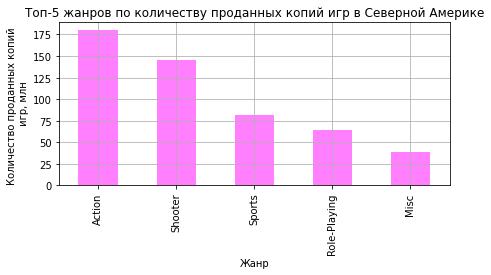

In [67]:
top_genres('na_sales')

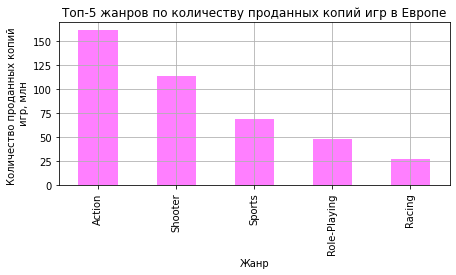

In [68]:
top_genres('eu_sales')

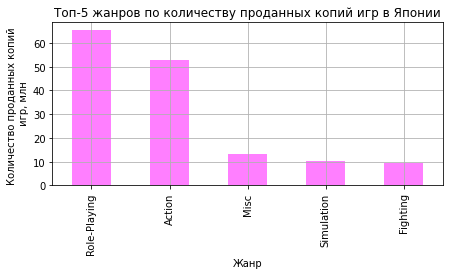

In [69]:
top_genres('jp_sales')

Можно заметить, что:
- в Северной Америке и Европе игровые предпочтения очень похожи - первые 4 места полностью совпадают и по содержанию и по расстановке. Американцы и европейцы любят игры в жанре action, shooter, sports и role-playing;
- в Японии предпочтения по жанрам отличаются. Японцы больше всего любят игры в жанре role-playing, затем action, simulation и fighting;
- Японцев объединяет с американцами и европейцами любовь к action и role-playing. А отличает - нелюбовь к shooter и sports.

#### <a name="4.3"> Влияние рейтинга ESRB на продажи игр </a>

Посмотрим, какие рейтинги ESRB есть в нашей таблице за актуальный период:

In [70]:
df['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T'], dtype=object)

Всего 4 рейтинга, не считая пропущенных значений.

Построим диаграмму, которая будет отражать, какую долю игры каждого из рейтингов ESRB занимают в общем числе продаж. Проще говоря, игры какого рейтинга самые популярные. Сделаем разбивку по регионам продаж.

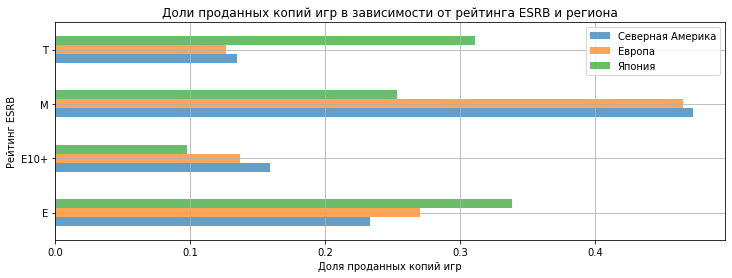

In [71]:
# сгруппируем по рейтингу и посчитаем суммы продаж в регионах
rating = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum() 
rating.columns = ['Северная Америка', 'Европа', 'Япония']
rating = rating.T
# добавим столбец с суммарным количеством проданных игр по регионам
rating['total'] = rating['E'] + rating['E10+'] + rating['M'] + rating['T']
# продажи игр переведём из абсолютных величин в относительные
rating['E'] = rating['E'] / rating['total']
rating['E10+'] = rating['E10+'] / rating['total']
rating['M'] = rating['M'] / rating['total']
rating['T'] = rating['T'] / rating['total']
# теперь удалим ненужный столбец
del rating['total']
# построим горизонтальную диаграмму
rating.T.plot(kind='barh', grid=True, alpha=.7, figsize=(12, 4))
plt.title("Доли проданных копий игр в зависимости от рейтинга ESRB и региона")
plt.ylabel("Рейтинг ESRB")
plt.xlabel("Доля проданных копий игр")
plt.show()

Можно заметить, что:
- в Северной Америке и Европе наиболее популярны игры с рейтингом M - «от 17 лет». Среди проданных игр, по которым у нас есть данные их рейтинга, игры с рейтингом M занимают около 48%. В Японии же такие игры занимают около 23%, почти в 2 раза меньше;
- среди японцев самые популярные игры имеют рейтинг E - «Для всех» - почти 35%. Также популярны игры с рейтингом T - «Подросткам» - около 31%. Европейцы и американцы значительно ниже любят игры с рейтингом T - они занимают меньше 15%;
- не слишком популярны среди и европейцев, и американцев, и японцев игры с рейтингом E10+ - «Для всех старше 10 лет». 

Подведём итоги по анализу игровых платформ, жанров игр и рейтингов ESRB, составим итоговые портреты пользователей для каждого региона:
- Северная Америка: пользователи предпочитают играть на домашних игровых консолях, как от американского бренда Microsoft (X360 и XOne), так и от японского Sony (PS3 и PS4). Наиболее популярные жанры action, shooter и sports. Больше всего игр продаётся с рейтингом M ("от 17 лет") - около 48%. На втором месте - с рейтингом E ("для всех") - около 23%, третьем - E10+ ("для всех старше 10 лет") - около 16%.
- Европа: как и американцы, европейские пользователи предпочитают домашние игровые консоли, однако платформы от японского бренда Sony (PS3 и PS4) более популярны, чем X360 и XOne от американского бренда Microsoft. Предпочтения по жанрам у них аналогичны американским - в первую тройку входят action, shooter и sports. Больше всего игр продаётся с рейтингом M (около 47%), E (около 28%) и E10+ (около 13%). Европейские пользователи очень похожи на американских, единственное существенное отличие, которое стоит выделить: европеец предпочтёт PS4 платформе X360.
- Япония: пользователи из этой страны сильно отличаются от игроков из Северной Америки и Европы. Они любят портативные игровые консоли - 3DS и PSV. Также любят и домашние консоли, однако только местного производства (PS3 и PS4). На X360 и XOne от Microsoft японцы не играют. Из жанровых вкусов их выделяет любовь к role-playing, simulation и fighting. Однако пользователи из всех трех регионов любят action. Самый популярный рейтинг игр у японцев - E (почти 35%) и T (около 31%).

[К началу](#contents)

### <a name="5"> Проверка гипотез </a>

#### <a name="5.1"> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые </a>

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для начала найдём их значения:

In [72]:
print('Средний пользовательский рейтинг платформы Xbox One:', df.query('platform == "XOne"').user_score.mean())
print('Средний пользовательский рейтинг платформы PC:', df.query('platform == "PC"').user_score.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC: 6.4454976303317535


Оценим, является ли такое различие случайным или оно статистически значимо. Сформулируем нулевую и альтернативную гипотезы:
- H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые, а полученное различие - случайное.
- H1: средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Составим две выборки: все рейтинги для XOne без пропусков и то же самое для PC:

In [73]:
xone_sample = df.query('platform == "XOne"').user_score.dropna()
pc_sample = df.query('platform == "PC"').user_score.dropna()

Рассчитаем дисперсии в выборках:

In [74]:
var_xone_sample = np.var(xone_sample, ddof=1)
var_pc_sample = np.var(pc_sample, ddof=1)
var_xone_sample, var_pc_sample

(1.9069968429360695, 2.747158203565786)

Проведём расчёты и найдём p-value. Применим метод ttest_ind, который принимает на вход две выборки, а на выходе мы получим вероятность, что они из одной ГС. Пороговый уровень альфа установим 0,05.

In [75]:
results = st.ttest_ind(xone_sample, pc_sample, equal_var=False)
# equal_var=False, так как дисперсии двух выборок отличаются достаточно сильно (примерно на 40%). 
# В связи с этим вместо t-критерия Стьюдента применяем t-критерий Уэлча. 
print('Вероятность совершить ошибку первого рода:', results.pvalue)
if results.pvalue < .5:
    print('Это меньше порогового значения альфа 0,05. Отклоняем нулевую гипотезу.')
else:
    print('Это больше порогового значения альфа 0,05. Недостаточно оснований отклонить нулевую гипотезу.')

Вероятность совершить ошибку первого рода: 0.6206366351489678
Это больше порогового значения альфа 0,05. Недостаточно оснований отклонить нулевую гипотезу.


Это означает, что различие в средних пользовательских рейтингах платформ Xbox One и PC является незначительным или случайным, и у нас недостаточно оснований считать, что пользовательский рейтинг как-то зависит от этих платформ. 

#### <a name="5.2"> Средние пользовательские рейтинги жанров Action и Sports разные </a>

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные. Для начала найдём их значения:

In [76]:
print('Средний пользовательский рейтинг жанра Action:', df.query('genre == "Action"').user_score.mean())
print('Средний пользовательский рейтинг жанра Sports:', df.query('genre == "Sports"').user_score.mean())

Средний пользовательский рейтинг жанра Action: 6.834274952919022
Средний пользовательский рейтинг жанра Sports: 5.455897435897437


Оценим, является ли такое различие случайным или оно статистически значимо. Сформулируем нулевую и альтернативную гипотезы:
- H0: средние пользовательские рейтинги жанров Action и Sports одинаковые, а полученное различие - случайное.
- H1: средние пользовательские рейтинги жанров Action и Sports разные.

Составим две выборки: все рейтинги жанров Action без пропусков и то же самое для Sports:

In [77]:
action_sample = df.query('genre == "Action"').user_score.dropna()
sports_sample = df.query('genre == "Sports"').user_score.dropna()

Рассчитаем дисперсии в выборках:

In [78]:
var_action_sample = np.var(action_sample, ddof=1)
var_sports_sample = np.var(sports_sample, ddof=1)
var_action_sample, var_sports_sample

(1.8819173506733466, 3.022890298704732)

Проведём расчёты и найдём p-value. Применим метод ttest_ind, который принимает на вход две выборки, а на выходе мы получим вероятность, что они из одной ГС. Пороговый уровень альфа установим 0,05.

In [79]:
results = st.ttest_ind(action_sample, sports_sample, equal_var=False)
# equal_var=False, так как дисперсии двух выборок отличаются достаточно сильно (примерно на 50%). 
# В связи с этим вместо t-критерия Стьюдента применяем t-критерий Уэлча. 
print('Вероятность совершить ошибку первого рода:', results.pvalue)
if results.pvalue < .5:
    print('Это меньше порогового значения альфа 0,05. Отклоняем нулевую гипотезу.')
else:
    print('Это больше порогового значения альфа 0,05. Недостаточно оснований отклонить нулевую гипотезу.')

Вероятность совершить ошибку первого рода: 2.337200239591976e-20
Это меньше порогового значения альфа 0,05. Отклоняем нулевую гипотезу.


Это означает, что различие в средних пользовательских рейтингах жанров Action и Sports является статистически значимым (то есть крайне маловероятно получилось случайно). У нас достаточно оснований считать, что пользовательский рейтинг зависит от этих жанров.

[К началу](#contents)

### <a name="6"> 6. Общий вывод </a>

Подведём итоги по результатам исследования. Чтобы обеспечить высокие продажи интернет-магазину «Стримчик» в 2017 году необходимо делать ставку на следующие игры:
- <b>с наличием рейтингов от пользователей, критиков и ESRB</b>. Мы выяснили, что среди игр, у которых есть все 3 рейтинга, чаще встречаются популярные, чем среди игр совсем без рейтингов. Поэтому если у игры есть все три рейтинга - это предпосылка к тому, что она должна быть представлена в магазине;
- в первую очередь, <b>для платформ PS4 и XOne</b>. Эти консоли имеют наиболее ранние этапы своих жизненных циклов - первые игры для них появились в 2013 году и в продаже пока только 4 года. В 2017 году игры на них будут продаваться наиболее активно. Платформы, которые вышли раньше и были очень популярны - 3DS, PS3 и X360, теряют свою популярность и в 2017 году уже будут не восстребованы;
- <b>с высокими рейтингами критиков - от 70 и выше</b>. Есть небольшая положительная взаимосвязь между продажами игр и рейтингами критиков (около 0,4 для PS4 и XOne). Только среди игр с рейтингом выше 70 есть настоящие хиты. Нужно следить за рейтингами критиков и проводить маркетинговые кампании одобренных ими игр;
- <b>в жанре action</b>. Это самый популярный жанр как за всё время наблюдений (36 лет), так и за последние 5 лет, причём с большим отрывом от второго места. Предпочтения пользователей стабильны. Кроме того, этот жанр восстребован по всех регионах - в Северной Америке, Европе и Японии. Помимо игр в жанре Action <b>в Северной Америке и Европе следует делать ставку на жанры shooter и sports. В Японии же - на role-playing, simulation и fighting</b>;
- <b>в Северной Америке и Европе - на игры для взрослых (с рейтингом M)</b> - там такие любят. Они занимают почти 50% от объёма продаж. <b>В Японии же - делать ставку на игры для всех (с рейтингом E) и для подростков (с рейтингом T)</b> - они занимают 35 и 31% от всех продаж соответственно;
- <b>в Северной Америке и Европе - для домашних консолей от Sony и Microsoft</b>. Портативные консоли тут не так непопулярны. <b>В Японии же - наоборот, в первую очередь популярны игры для портативных консолей 3DS и PSV, а также для домашних консолей от Sony (PS3 и PS4)</b>. В игры на X360 и XOne от Microsoft японцы не играют.

[К началу](#contents)